# CHIRPS - Precipitation Data
 - **@author**: Mario Garcia (mario.garcia@utec.edu.uy)
 - **@description**: Anexo de la altitud al dataset de los satelites
 - **Data Source**:  ../02 - DataSource/
 - **Output**: 
  - **chirps_daily_2000_2020_ext.nc** (Dataset netCDF unificado de las estaciones chirps con anexo de geodatos de altitud)
 
  - mater_chirps_daily_2000_2020_ext.nc (Dataset netCDF chirps_daily_2000_2020_ext.nc que ha pasado control de calidad y puede ser utilizado para la próxima etapa)

 - **Input**: 
   - ***master_chirps_daily_2000_2020.nc*** (Dataset netCDF con la informacion de los pluviometros con lat/lon.)
 - **@version**: v1.3
 - **@date**: 2022-08-10,  2022-08-06, 2022-08-01, 2022-07-30, 2022-07-26   

## Setup

In [1]:
dir_google_drive = "/content/drive/MyDrive/ValidacionProductosSatelitales(VPS)/Proyecto Colab/04 - Data Ext"
dir_google_drive_output = dir_google_drive+'/datasets/output/'
dir_data = './data/'
dir_data_source = dir_data+'/source/'
dir_var = './var/'
dir_download = dir_var+'/download/'
dir_output = dir_var+'/output/'
dir_log = dir_var+'/log/'



### Libraries

In [2]:
# https://pypi.org/project/wget/
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=df67ffa5606a1b7d1e201491e0db031047cb510180f430ba680aafbbf1e1cd8f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [3]:
!pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 31.0 MB/s 
     |████████████████████████████████| 16.7 MB 390 kB/s 


In [4]:
# Data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Utils
import wget
import os 
import shutil
import glob

# Zip
import zipfile

# NetCDF
import xarray  as xr

# GEO MAPS
# https://jcutrer.com/python/learn-geopandas-plotting-usmaps
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [5]:
# Geo elevation data parser for "The Shuttle Radar Topography Mission" data
!pip install SRTM.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 3.9 MB/s 
  Created wheel for SRTM.py: filename=SRTM.py-0.3.7-py3-none-any.whl size=105861 sha256=d976e5ebc1d74ada65d9fabd291376fa20e9db95fbd8c22582c274b4afc87ee4
  Stored in directory: /root/.cache/pip/wheels/f4/c7/b2/2469a4747bd19d3af08be5cada09cda02c00f29d472e9e3461
Successfully built SRTM.py


In [6]:
# https://www.usna.edu/Users/oceano/pguth/md_help/html/srtm.htm
# importante el siguiente link
# http://viewfinderpanoramas.org/Coverage%20map%20viewfinderpanoramas_org3.htm 
#  for f in ['SG21','SG22',   'SH21','SH22',  'SI21','SI22',  'SJ21']:

%%bash
mkdir -p /content/var/log
mkdir -p /content/var/download
mkdir -p /root/.cache/srtm/

cat > /content/var/download/download.txt << EOF
http://viewfinderpanoramas.org/dem3/SG21.zip 
http://viewfinderpanoramas.org/dem3/SG22.zip 
http://viewfinderpanoramas.org/dem3/SH21.zip 
http://viewfinderpanoramas.org/dem3/SH22.zip 
http://viewfinderpanoramas.org/dem3/SI21.zip 
http://viewfinderpanoramas.org/dem3/SI22.zip 
http://viewfinderpanoramas.org/dem3/SJ21.zip 
EOF

wget  -P /content/var/download \
      --no-clobber --continue --wait=1 \
      -o /content/var/log/wget.log \
      -i "/content/var/download/download.txt"  

unzip -o /content/var/download/SG22.zip  -d /content/var/download/
unzip -o /content/var/download/SG22.zip  -d /content/var/download/
unzip -o /content/var/download/SH21.zip  -d /content/var/download/
unzip -o /content/var/download/SH22.zip  -d /content/var/download/
unzip -o /content/var/download/SI21.zip  -d /content/var/download/
unzip -o /content/var/download/SI22.zip  -d /content/var/download/
unzip -o /content/var/download/SJ21.zip  -d /content/var/download/

mv -v /content/var/download/G22/*  /root/.cache/srtm
mv -v /content/var/download/G22/*  /root/.cache/srtm
mv -v /content/var/download/H21/*  /root/.cache/srtm
mv -v /content/var/download/H22/*  /root/.cache/srtm
mv -v /content/var/download/I21/*  /root/.cache/srtm
mv -v /content/var/download/I22/*  /root/.cache/srtm
mv -v /content/var/download/J21/*  /root/.cache/srtm

ls -lhas /root/.cache/srtm/ 

Archive:  /content/var/download/SG22.zip
   creating: /content/var/download/G22/
  inflating: /content/var/download/G22/S25W049.hgt  
  inflating: /content/var/download/G22/S25W050.hgt  
  inflating: /content/var/download/G22/S25W051.hgt  
  inflating: /content/var/download/G22/S25W052.hgt  
  inflating: /content/var/download/G22/S25W053.hgt  
  inflating: /content/var/download/G22/S25W054.hgt  
  inflating: /content/var/download/G22/S26W049.hgt  
  inflating: /content/var/download/G22/S26W050.hgt  
  inflating: /content/var/download/G22/S26W051.hgt  
  inflating: /content/var/download/G22/S26W052.hgt  
  inflating: /content/var/download/G22/S26W053.hgt  
  inflating: /content/var/download/G22/S26W054.hgt  
  inflating: /content/var/download/G22/S27W049.hgt  
  inflating: /content/var/download/G22/S27W050.hgt  
  inflating: /content/var/download/G22/S27W051.hgt  
  inflating: /content/var/download/G22/S27W052.hgt  
  inflating: /content/var/download/G22/S27W053.hgt  
  inflating: /cont

mv: cannot stat '/content/var/download/G22/*': No such file or directory


In [7]:
import srtm
elevation_data = srtm.get_data()

# Check if is NaN
def is_nan(x):
    return (x != x)
    
def get_elevation(lat, lon):
    if is_nan(lat):
        return ''
    if is_nan(lon):
        return ''
    
    return elevation_data.get_elevation(lat,lon,approximate=True)

In [8]:
def fill_altitude(ds_xr):
  # ndarray_date = ds_xr.coords['time'].values		
  ndarray_lat = ds_xr.coords['lat'].values		
  ndarray_lon = ds_xr.coords['lon'].values	

  df_lat_lon = []

  for lat in ndarray_lat:
    for lon in ndarray_lon:
      df_lat_lon.append([lat,lon])

  df_lat_lon = pd.DataFrame(df_lat_lon, columns=['lat','lon'])

  df_lat_lon['alt'] = df_lat_lon.apply(lambda x: get_elevation(x['lat'], x['lon']), axis=1)
  df_lat_lon.set_index(['lat','lon'], inplace=True)

  return df_lat_lon

In [9]:
def get_geometry_uruguay():
  df_world_shapes = gpd.read_file(dir_data+"/TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shp")
  df_uruguay_shapes = df_world_shapes[ df_world_shapes['ISO2'] == 'UY']
  # df_uruguay_shapes
  polygon_uruguay = df_uruguay_shapes['geometry']
  return polygon_uruguay
  # polygon_uruguay = geometry[210]
  # return gpd.GeoSeries(polygon_uruguay)

### Init

In [10]:
!rm -rf "$dir_data"

!mkdir -p "$dir_data"
!mkdir -p "$dir_data_source"
!mkdir -p "$dir_download"
!mkdir -p "$dir_output"
!mkdir -p "$dir_log"

!mkdir -p "$dir_data"/TM_WORLD_BORDERS
!wget  -O "$dir_download"/TM_WORLD_BORDERS-0.3.zip  http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip 
!unzip -o "$dir_download"/TM_WORLD_BORDERS-0.3.zip -d "$dir_data"/TM_WORLD_BORDERS 


--2022-08-10 23:23:18--  http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip
Resolving thematicmapping.org (thematicmapping.org)... 67.20.120.230
Connecting to thematicmapping.org (thematicmapping.org)|67.20.120.230|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3464707 (3.3M) [application/zip]
Saving to: ‘./var//download//TM_WORLD_BORDERS-0.3.zip’

./var//download//TM 100%[===================>]   3.30M  8.67MB/s    in 0.4s    

2022-08-10 23:23:19 (8.67 MB/s) - ‘./var//download//TM_WORLD_BORDERS-0.3.zip’ saved [3464707/3464707]

Archive:  ./var//download//TM_WORLD_BORDERS-0.3.zip
  inflating: ./data//TM_WORLD_BORDERS/Readme.txt  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.dbf  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.prj  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shp  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shx  


## Download Data

In [11]:
filename = dir_data_source+"/master_chirps_daily_2000_2020.nc"
!gdown -O $filename "1CF_OqLLHeDJkU3Y5wwQDIcism8q02xs-"

Downloading...
From: https://drive.google.com/uc?id=1CF_OqLLHeDJkU3Y5wwQDIcism8q02xs-
To: /content/data/source/master_chirps_daily_2000_2020.nc
100% 62.1M/62.1M [00:00<00:00, 134MB/s]


In [12]:
ds_xr = xr.open_dataset(filename)
ds_xr

<xarray.Dataset>
Dimensions:        (time: 7671, lat: 100, lon: 120)
Coordinates:
  * lat            (lat) float32 -34.97 -34.92 -34.88 ... -30.12 -30.07 -30.02
  * lon            (lon) float32 -58.98 -58.93 -58.88 ... -53.13 -53.08 -53.03
  * time           (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-12-31
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

## Reordering Dimensions

In [13]:
ds_xr.dims

Frozen({'time': 7671, 'lat': 100, 'lon': 120})

In [14]:
ds_xr_ext = ds_xr.transpose( "time", "lat", "lon")
ds_xr_ext

<xarray.Dataset>
Dimensions:        (time: 7671, lat: 100, lon: 120)
Coordinates:
  * lat            (lat) float32 -34.97 -34.92 -34.88 ... -30.12 -30.07 -30.02
  * lon            (lon) float32 -58.98 -58.93 -58.88 ... -53.13 -53.08 -53.03
  * time           (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-12-31
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [15]:
# ul (upper-left) ur (upper-right)
# ll (lower-left) lr (lower-right)

# We're using coors from  ul (upper-left) 

ds_xr_ext = ds_xr_ext.sortby('time', ascending=True)
ds_xr_ext = ds_xr_ext.sortby('lat', ascending=False)
ds_xr_ext = ds_xr_ext.sortby('lon', ascending=True)
ds_xr_ext

<xarray.Dataset>
Dimensions:        (time: 7671, lat: 100, lon: 120)
Coordinates:
  * lat            (lat) float32 -30.02 -30.07 -30.12 ... -34.88 -34.92 -34.97
  * lon            (lon) float32 -58.98 -58.93 -58.88 ... -53.13 -53.08 -53.03
  * time           (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-12-31
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

## Add Altitude

In [16]:
df_lat_lon = fill_altitude(ds_xr_ext)
df_lat_lon

alt
lat        lon             
-30.025000 -58.975006  42.0
           -58.925003  51.5
           -58.875008  54.0
           -58.825005  63.0
           -58.775002  72.5
...                     ...
-34.974998 -53.225006   0.0
           -53.175003   0.0
           -53.125008   0.0
           -53.075005   0.0
           -53.025002   0.0

[12000 rows x 1 columns]

In [17]:
df_ll_pivot = df_lat_lon.reset_index().pivot(index='lat', columns='lon', values='alt')

# We're using coors from  ul (upper-left) 
df_ll_pivot = df_ll_pivot.sort_index(ascending=False).sort_index(axis=1, ascending=True)

df_ll_pivot


lon,-58.975006,-58.925003,-58.875008,-58.825005,-58.775002,-58.725006,-58.675003,-58.625008,-58.575005,-58.525002,...,-53.475006,-53.425003,-53.375008,-53.325005,-53.275002,-53.225006,-53.175003,-53.125008,-53.075005,-53.025002
lat,,,,,,,,,,,,,,,,,,,,,
-30.025000,42.0,51.5,54.0,63.0,72.5,69.5,68.5,72.0,72.0,75.5,...,94.0,80.0,41.0,58.0,86.0,85.5,31.5,73.5,32.0,28.0
-30.074999,48.5,58.5,67.0,66.0,62.5,67.0,73.0,76.0,77.5,68.5,...,47.0,81.0,63.0,78.5,53.5,45.0,42.5,61.0,50.5,56.5
-30.125000,50.0,54.0,58.0,66.5,69.0,70.5,70.5,71.0,65.5,66.0,...,59.5,86.0,92.5,52.5,43.0,43.5,64.5,73.0,33.0,28.5
-30.174999,63.0,67.0,62.0,63.0,55.5,58.5,58.0,59.0,63.5,66.5,...,114.5,90.0,52.0,49.5,59.5,61.5,64.5,56.5,37.0,51.5
-30.225000,46.5,48.5,51.5,52.0,52.0,61.5,59.5,66.5,65.0,69.0,...,110.5,59.0,103.0,93.5,96.0,70.5,67.0,92.0,37.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-34.775002,29.5,31.5,31.5,31.5,27.5,26.5,6.0,19.0,10.0,7.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-34.825001,32.5,34.5,28.0,29.5,22.5,16.5,22.5,9.5,10.5,18.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-34.875000,38.0,31.5,28.0,29.5,25.0,26.5,14.5,13.5,16.5,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Add altitude
ds_xr_ext['altitude'] = (['lat','lon'], df_ll_pivot.to_numpy())
ds_xr_ext['altitude'] = ds_xr_ext['altitude'].astype(np.float32)
ds_xr_ext

<xarray.Dataset>
Dimensions:        (time: 7671, lat: 100, lon: 120)
Coordinates:
  * lat            (lat) float32 -30.02 -30.07 -30.12 ... -34.88 -34.92 -34.97
  * lon            (lon) float32 -58.98 -58.93 -58.88 ... -53.13 -53.08 -53.03
  * time           (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-12-31
Data variables:
    precipitation  (time, lat, lon) float32 ...
    altitude       (lat, lon) float32 42.0 51.5 54.0 63.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [19]:
# display(ds_xr_ext['altitude'][0,0]) # lat -30.25   lon -58.50   alt 70.5
# display(ds_xr_ext['altitude'][0,2]) # lat -30.25   lon -58.00   alt 65.0
# display(ds_xr_ext['altitude'][2,0]) # lat -30.75   lon -58.50   alt 71.0
# display(ds_xr_ext['altitude'][2,2]) # lat -30.75   lon -58.00   alt 67.5

## Add Meta Data

In [20]:
import datetime 
ds_xr_ext.attrs = {
    'creation_date': '2022-07-27', 
    'author':'Mario Garcia', 
    'email':'mariogarcia.ar@gmail.com',

    'algorithm': 'chirps',
    'url': '',
    'type': 'satellite-based precipitation products',
    'spatial resolution': '0.05',
    'time resolution': '1 day',
    }

# ds_xr_ext['date'].attrs = {'units':'datetime', 'long_name':'Date'}
ds_xr_ext['lat'].attrs = {'units':'decimal degrees', 'long_name':'Latitude'}
ds_xr_ext['lon'].attrs = {'units':'decimal degrees', 'long_name':'Longitude'}
ds_xr_ext

<xarray.Dataset>
Dimensions:        (time: 7671, lat: 100, lon: 120)
Coordinates:
  * lat            (lat) float32 -30.02 -30.07 -30.12 ... -34.88 -34.92 -34.97
  * lon            (lon) float32 -58.98 -58.93 -58.88 ... -53.13 -53.08 -53.03
  * time           (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2020-12-31
Data variables:
    precipitation  (time, lat, lon) float32 ...
    altitude       (lat, lon) float32 42.0 51.5 54.0 63.0 ... 0.0 0.0 0.0 0.0
Attributes:
    creation_date:       2022-07-27
    author:              Mario Garcia
    email:               mariogarcia.ar@gmail.com
    algorithm:           chirps
    url:                 
    type:                satellite-based precipitation products
    spatial resolution:  0.05
    time resolution:     1 day

In [21]:
ds_xr_ext.info()

xarray.Dataset {
dimensions:
	time = 7671 ;
	lat = 100 ;
	lon = 120 ;

variables:
	float32 precipitation(time, lat, lon) ;
	float32 lat(lat) ;
		lat:units = decimal degrees ;
		lat:long_name = Latitude ;
	float32 lon(lon) ;
		lon:units = decimal degrees ;
		lon:long_name = Longitude ;
	datetime64[ns] time(time) ;
	float32 altitude(lat, lon) ;

// global attributes:
	:creation_date = 2022-07-27 ;
	:author = Mario Garcia ;
	:email = mariogarcia.ar@gmail.com ;
	:algorithm = chirps ;
	:url =  ;
	:type = satellite-based precipitation products ;
	:spatial resolution = 0.05 ;
	:time resolution = 1 day ;
}

## Export

In [22]:
file_nc = dir_output+'/chirps_daily_2000_2020_ext.nc'
ds_xr_ext.to_netcdf(file_nc)

In [23]:
# Export to drive
!cp "$file_nc" "$dir_google_drive_output" 

## Plot

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


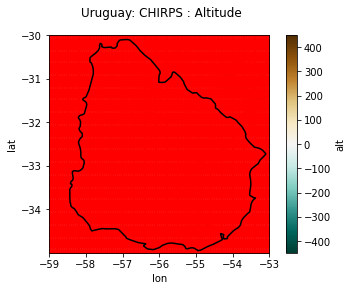

In [24]:
# coordinate reference system
crs={'init':'epsg:4326'}

geodf_shape = get_geometry_uruguay()

geometry=[Point(xy) for xy in zip(df_lat_lon.reset_index()['lon'], df_lat_lon.reset_index()['lat'])]

fig, axs = plt.subplots()  

df_lat_lon.to_xarray()['alt'].plot(ax=axs, cmap="BrBG_r",) #terrain BrBG_r

df_geo_cells = gpd.GeoDataFrame([],crs=crs, geometry=geometry)
df_geo_cells.plot(ax=axs, color='red', markersize=5)

geodf_shape.boundary.plot(ax=axs, color="black")


fig.suptitle(f'Uruguay: CHIRPS : Altitude ', fontsize=12)
plt.show()